In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/ubuntu/sustaingym


In [3]:
import pandas as pd

pd.read_csv('/home/ubuntu/sustaingym/sustaingym/data/moer/SGIP_CAISO_PGE_2019-05.csv.gz', compression='gzip')

,time,moer,f1,f2,f3,f4,f5,f6,f7,f8,...,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36
0,2019-06-02 00:00:00+00:00,0.068160,0.081727,0.074934,0.068324,0.069948,0.070618,0.076233,0.098283,0.131988,...,0.207547,0.215294,0.221092,0.212211,0.252212,0.259550,0.271975,0.256504,0.252232,0.231410
1,2019-06-01 23:55:00+00:00,0.097698,0.090842,0.081783,0.077369,0.074005,0.074474,0.071572,0.076233,0.098283,...,0.203654,0.207547,0.215294,0.221092,0.212211,0.252212,0.259550,0.271975,0.256504,0.252232
2,2019-06-01 23:50:00+00:00,0.097698,0.085585,0.077403,0.070610,0.070009,0.070406,0.064798,0.071572,0.076233,...,0.204569,0.203654,0.207547,0.215294,0.221092,0.212211,0.252212,0.259550,0.271975,0.256504
3,2019-06-01 23:45:00+00:00,0.101629,0.080329,0.070711,0.067121,0.067531,0.068204,0.063196,0.064798,0.071572,...,0.230988,0.204569,0.203654,0.207547,0.215294,0.221092,0.212211,0.252212,0.259550,0.271975
4,2019-06-01 23:40:00+00:00,0.082864,0.072876,0.067775,0.062103,0.059520,0.060319,0.059174,0.063196,0.064798,...,0.359753,0.230988,0.204569,0.203654,0.207547,0.215294,0.221092,0.212211,0.252212,0.259550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9500,2019-04-30 00:20:00+00:00,0.064161,0.129640,0.177531,0.225701,0.257161,0.280873,0.406989,0.352015,0.159182,...,0.345098,0.337355,0.340728,0.340413,0.331785,0.327858,0.316743,0.307366,0.304084,0.257197
9501,2019-04-30 00:15:00+00:00,0.018812,0.160554,0.182483,0.218161,0.257334,0.293472,0.406108,0.406989,0.352015,...,0.328915,0.345098,0.337355,0.340728,0.340413,0.331785,0.327858,0.316743,0.307366,0.304084
9502,2019-04-30 00:10:00+00:00,0.157615,0.183963,0.223752,0.233715,0.253082,0.293388,0.391840,0.406108,0.406989,...,0.342833,0.328915,0.345098,0.337355,0.340728,0.340413,0.331785,0.327858,0.316743,0.307366
9503,2019-04-30 00:05:00+00:00,0.189696,0.185050,0.183077,0.230539,0.236911,0.265296,0.360482,0.391840,0.406108,...,0.341982,0.342833,0.328915,0.345098,0.337355,0.340728,0.340413,0.331785,0.327858,0.316743


In [9]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from stable_baselines3 import PPO

from sustaingym.envs.evcharging import GMMsTraceGenerator, EVChargingEnv, RealTraceGenerator

In [7]:
env = EVChargingEnv(GMMsTraceGenerator('caltech', 'Summer 2021'))
env.cn

acnportal.acnsim.network.charging_network.ChargingNetwork(_EVSEs=<collections.OrderedDict object at 0x7ff87ff014c0>, constraint_matrix=<numpy.ndarray object at 0x7ff86fd692d0>, magnitudes=<numpy.ndarray object at 0x7ff86fd69a50>, constraint_index=<list object at 0x7ff92c05b340>, _voltages=<numpy.ndarray object at 0x7ff86fd69e70>, _phase_angles=<numpy.ndarray object at 0x7ff86fd69b70>, violation_tolerance=1e-05, relative_tolerance=1e-07, _station_ids_dict=<dict object at 0x7ff86fd90140>, max_pilot_signals=<numpy.ndarray object at 0x7ff86fd414b0>, min_pilot_signals=<numpy.ndarray object at 0x7ff86fe65030>, allowable_rates=<list object at 0x7ff86fd881c0>, is_continuous=<numpy.ndarray object at 0x7ff86fd895d0>)

Text(95.72222222222221, 0.5, 'Constraint Index')

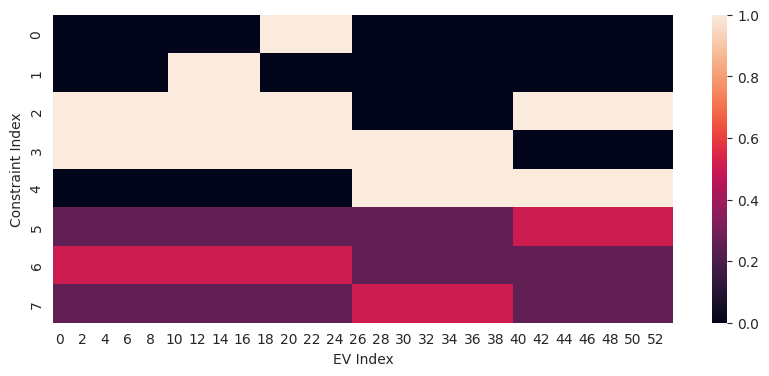

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.heatmap(np.abs(env.cn.constraint_matrix), ax=ax)
ax.set_xlabel('EV Index')
ax.set_ylabel('Constraint Index')

In [20]:
%pip install networkx
import networkx as nx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
adjmat = 